In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('data.csv')

In [30]:
data.head(10)

,x1,x2,x3,x4,y
0,-3,-2,-3,-2,1
1,-4,-3,-2,0,1
2,3,-5,-5,2,2
3,-2,3,-2,-4,1
4,-4,-1,1,4,0
5,2,-5,-5,-5,2
6,0,4,0,0,1
7,0,-4,-2,-1,2
8,4,1,-2,-4,2
9,2,-5,-1,0,2


In [31]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 5 columns):
x1    1578 non-null int64
x2    1578 non-null int64
x3    1578 non-null int64
x4    1578 non-null int64
y     1578 non-null int64
dtypes: int64(5)
memory usage: 61.7 KB


In [32]:
data.describe()

,x1,x2,x3,x4,y
count,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000
mean,-0.637516,-0.394804,-1.198352,-0.004436,0.962611
std,3.154112,2.922269,1.944199,2.970257,0.799807
min,-5.000000,-5.000000,-5.000000,-5.000000,0.000000
25%,-4.000000,-3.000000,-3.000000,-3.000000,0.000000
50%,-1.000000,0.000000,-1.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000,4.000000,2.000000


In [33]:
data.x1

0      -3
1      -4
2       3
3      -2
4      -4
5       2
6       0
7       0
8       4
9       2
10     -5
11      1
12     -5
13     -1
14     -3
15      3
16     -5
17      2
18     -5
19     -3
20      2
21     -1
22     -5
23     -4
24     -5
25      4
26      0
27     -3
28      1
29     -5
       ..
1548    1
1549   -3
1550   -5
1551   -5
1552    4
1553   -3
1554   -3
1555   -1
1556   -1
1557    4
1558    4
1559   -4
1560    3
1561   -2
1562   -5
1563    2
1564    0
1565    3
1566    0
1567    3
1568    2
1569   -5
1570    0
1571   -4
1572   -2
1573    1
1574    4
1575    1
1576   -2
1577    0
Name: x1, Length: 1578, dtype: int64

In [34]:
x = data[['x1','x2','x3','x4']]
y = data['y']



In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression    
logreg = LogisticRegression() 

logreg.fit(x_train,y_train)

y_pred_class=logreg.predict(x_test)   

 

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_test, y_pred_class))  

Accuracy: 0.9778481012658228


In [39]:
print("Intercept:", logreg.intercept_)
print('Coefficient', logreg.coef_)

Intercept: [-4.19546324 -3.21251524 -4.69371361]
Coefficient [[ 0.92052479 -0.71093853  2.02823359  2.98103043]
 [-0.89713157  0.55509136 -0.770296    0.14112017]
 [ 1.39458468 -0.43864047 -0.65337787 -1.78741335]]


In [40]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_class))


Confusion Matrix:
 [[ 98   5   0]
 [  2 130   0]
 [  0   0  81]]


In [43]:
score = logreg.score(x_test, y_test)
print('Score:\n',score)

Score:
 0.9778481012658228


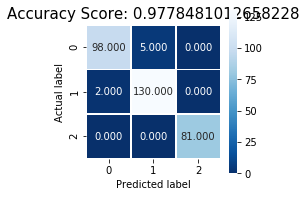

In [44]:
cm = metrics.confusion_matrix(y_test, y_pred_class)
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)

plt.title(all_sample_title, size = 15);
plt.show()

In [45]:
print('Classification Report:\n', classification_report(y_test, y_pred_class))




Classification Report:
              precision    recall  f1-score   support

          0       0.98      0.95      0.97       103
          1       0.96      0.98      0.97       132
          2       1.00      1.00      1.00        81

avg / total       0.98      0.98      0.98       316



Text(0,0.5,'Predicted Y')

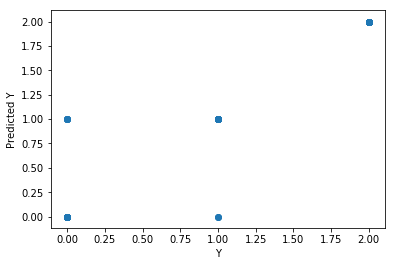

In [46]:
plt.scatter(y_test, y_pred_class)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

OneVsRestClassifier

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


In [48]:
ovoc = OneVsRestClassifier(LinearSVC(random_state=0))
ovoc.fit(x_train, y_train)
y_pred_class1=ovoc.predict(x_test) 


In [49]:
from sklearn import metrics 
print('Accuracy:', accuracy_score(y_test, y_pred_class1))  

Accuracy: 0.9873417721518988


Text(0,0.5,'Predicted Y')

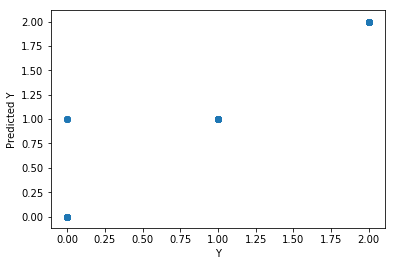

In [50]:
plt.scatter(y_test, y_pred_class1)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

In [51]:
print("Intercept:", ovoc.intercept_)
print('Coefficient', ovoc.coef_)

Intercept: [[-2.27880168]
 [-1.13195862]
 [-2.10271464]]
Coefficient [[ 0.44339412 -0.35142192  0.95773837  1.5285465 ]
 [-0.30981776  0.19245683 -0.28162756  0.06094908]
 [ 0.61573866 -0.17332821 -0.31848434 -0.74711681]]


In [52]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_class1))

Confusion Matrix:
 [[ 99   4   0]
 [  0 132   0]
 [  0   0  81]]


In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_test, y_pred_class1))
print('Classification Report:\n', classification_report(y_test, y_pred_class1))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_class1))

score = ovoc.score(x_test, y_test)
print('Score:\n',score) 




Accuracy: 0.9873417721518988
Classification Report:
              precision    recall  f1-score   support

          0       1.00      0.96      0.98       103
          1       0.97      1.00      0.99       132
          2       1.00      1.00      1.00        81

avg / total       0.99      0.99      0.99       316

Confusion Matrix:
 [[ 99   4   0]
 [  0 132   0]
 [  0   0  81]]
Score:
 0.9873417721518988


In [62]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

In [63]:
def cost(X_b, y_b, W, m):
    return  -(1./m) * np.sum(
        (np.multiply(y_b, np.log(sigmoid(np.dot(W,X_b))))) +
        (np.multiply((1-y_b),np.log(1-sigmoid(np.dot(W,X_b))))))


In [64]:
def logisticRegression(x_a, y_a, alpha, iterations):
    x_b=np.c_[np.ones((len(y_a), 1)), x_a]
    y_b=np.array(y_a).reshape(1,len(y_a))
    x_b=x_b.T
    cost_list = []
    m = np.size(x_b, axis=1)
    W = np.random.random((1, x_b.shape[0]))
    for i in range(iterations):
        W = W - (alpha/m) * np.dot((sigmoid(np.dot(W,x_b)) - y_b), x_b.T)
        cost_ = cost(x_b, y_b, W, m)
        cost_list.append([i, cost_])
    return W, cost_list

W0 = [[-5.56310931  1.13713376 -0.89450115  2.49671961  3.81937403]]


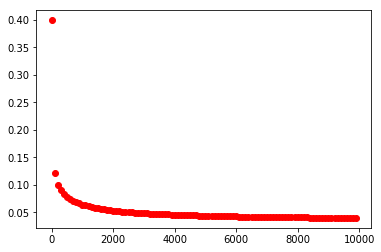

In [65]:
y0 = y_train.copy()
y0[y_train==0]=1
y0[y_train==1]=0
y0[y_train==2]=0
W0, cost_list = logisticRegression(x_train, y0, 0.1, 10000)

print('W0 =', W0)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()


In [66]:
x_b=np.c_[np.ones((x_test.shape[0], 1)), x_test].T
predictions = np.dot(W0,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y0_test = y_test.copy()
y0_test[y_test==0]=1
y0_test[y_test==1]=0
y0_test[y_test==2]=0
print("Accuracy for class 0:", sum(y0_test == predictions[0]) / x_test.shape[0] )

Accuracy for class 0: 0.9715189873417721


W1 = [[-3.46607066 -0.93283357  0.58784206 -0.86735651  0.18243708]]


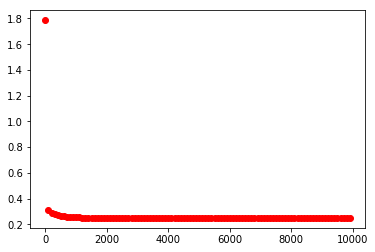

In [67]:
y1 = y_train.copy()
y1[y_train==0]=0
y1[y_train==1]=1
y1[y_train==2]=0
W1, cost_list = logisticRegression(x_train, y1, 0.1, 10000)

print('W1 =', W1)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()


In [68]:
x_b=np.c_[np.ones((x_test.shape[0], 1)), x_test].T
predictions = np.dot(W1,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y1_test = y_test.copy()
y1_test[y_test==0]=0
y1_test[y_test==1]=1
y1_test[y_test==2]=0
print("Accuracy for class 1:", sum(y1_test == predictions[0]) / x_test.shape[0] )

Accuracy for class 1: 0.8639240506329114


W2 = [[-6.02487632  1.72971355 -0.52337814 -0.89356892 -2.14241957]]


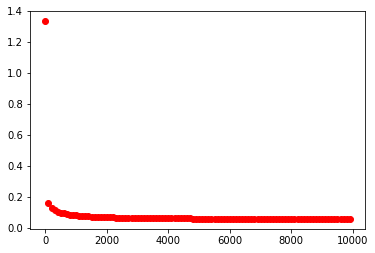

In [69]:
y2 = y_train.copy()
y2[y_train==0]=0
y2[y_train==1]=0
y2[y_train==2]=1
W2, cost_list = logisticRegression(x_train, y2, 0.1, 10000)

print('W2 =', W2)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'ro')
plt.show()

In [70]:
x_b=np.c_[np.ones((x_test.shape[0], 1)), x_test].T
predictions = np.dot(W2,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y2_test = y_test.copy()
y2_test[y_test==0]=0
y2_test[y_test==1]=0
y2_test[y_test==2]=1
print("Accuracy for class 2:", sum(y2_test == predictions[0]) / x_test.shape[0] )

Accuracy for class 2: 0.9810126582278481


In [71]:
def distance(W, x):
    numerator = np.dot(W, x)
    denominator = np.sqrt(np.dot(W, W.T))
    return numerator/denominator


In [73]:

X_b=np.c_[np.ones((x_test.shape[0], 1)), x_test].T

X_predict0 = np.dot(W0, X_b)
X_predict1 = np.dot(W1, X_b)
X_predict2 = np.dot(W2, X_b)
X_predict0[X_predict0 < 0] = 0
X_predict0[X_predict0 >0] = 1
X_predict1[X_predict1 < 0] = 0
X_predict1[X_predict1 >0] = 1
X_predict2[X_predict2 < 0] = 0
X_predict2[X_predict2 >0] = 1
p=np.r_[X_predict0,X_predict1,X_predict2]

dist=np.r_[distance(W0, X_b),distance(W1, X_b),distance(W2, X_b)]
prediction=np.argmax(dist,0)

print("Accuracy in compare to the test data:", sum(y_test == prediction) / x_test.shape[0] )

Accuracy in compare to the test data: 0.9620253164556962
